/tmp/ipykernel_136/3913440116.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="1981-01", periods=480, freq="M")


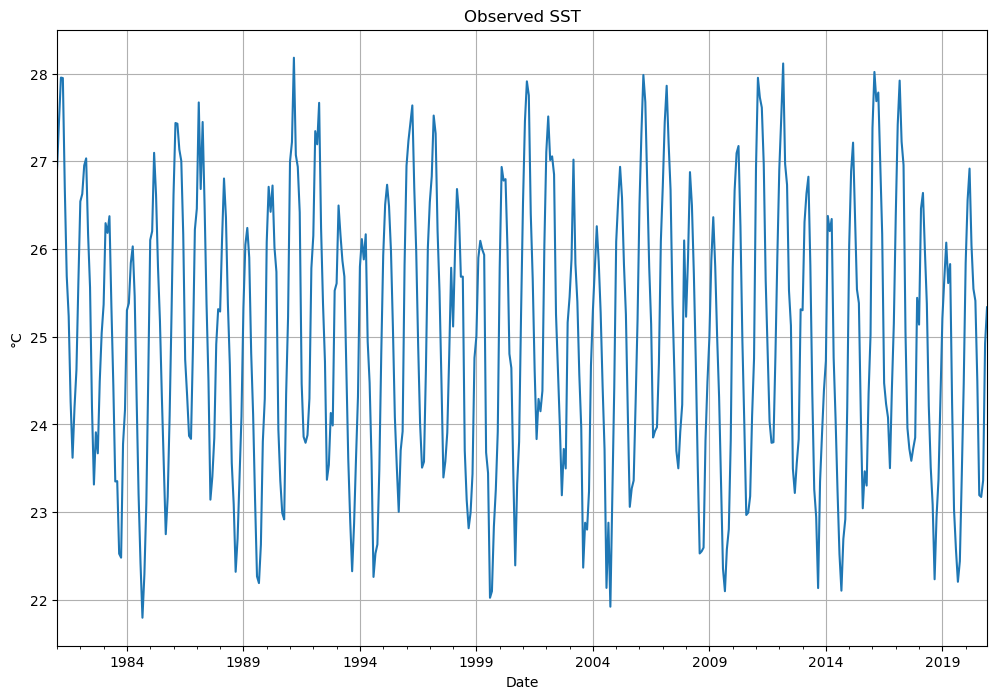

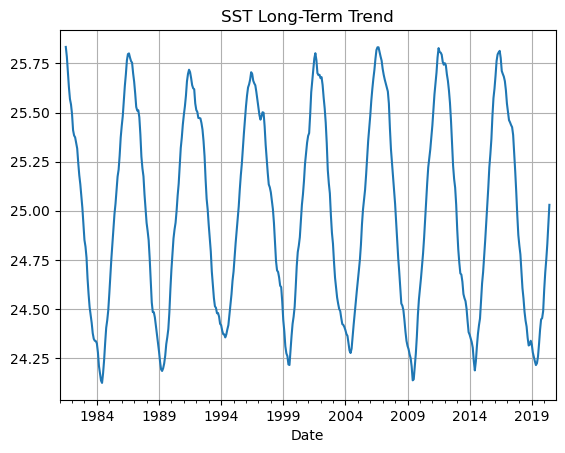

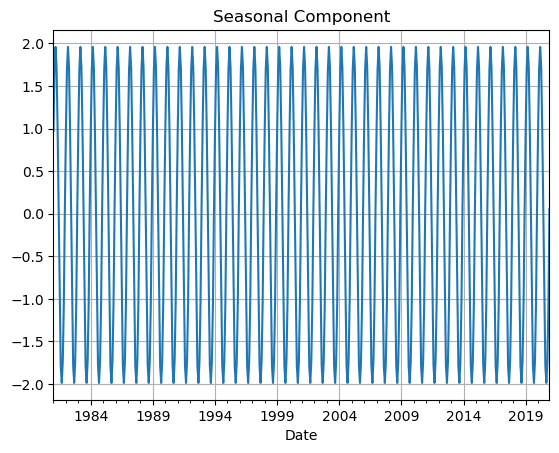

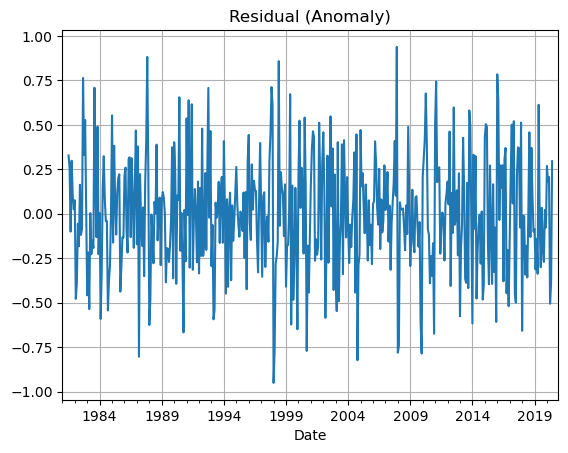

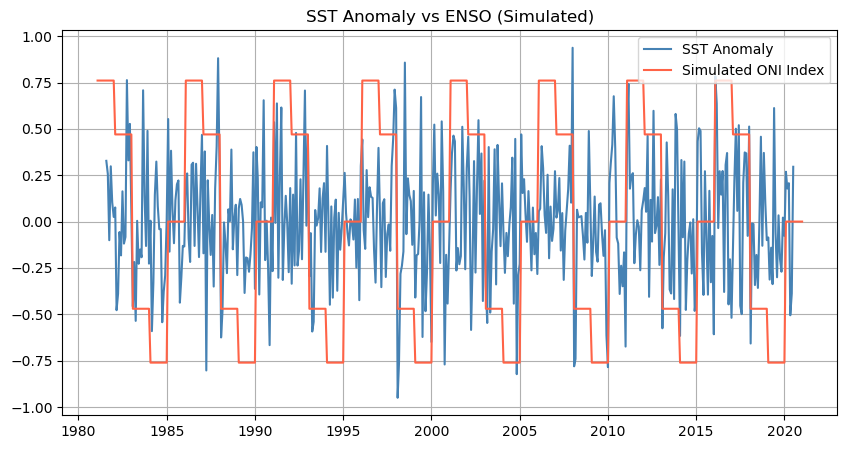

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate 40 years of monthly SST (480 months from 1981 to 2021)
np.random.seed(42)
months = pd.date_range(start="1981-01", periods=480, freq="M")

# Base seasonal SST cycle + ENSO anomalies + noise
seasonal_pattern = 25 + 2 * np.sin(2 * np.pi * months.month / 12)  # Annual cycle
enso_anomaly = np.sin(2 * np.pi * months.year / 5)  # Simulated ENSO signal (5-year cycles)
noise = np.random.normal(0, 0.3, size=len(months))
sst = seasonal_pattern + 0.8 * enso_anomaly + noise

# Create DataFrame
df = pd.DataFrame({
    "Date": months,
    "SST": sst
}).set_index("Date")

# Decompose SST time series (additive model)
result = seasonal_decompose(df['SST'], model='additive', period=12)

# Plot full decomposition
plt.figure(figsize=(12, 8))
result.observed.plot(title='Observed SST', ylabel='°C')
plt.grid(True)
plt.show()

result.trend.plot(title='SST Long-Term Trend')
plt.grid(True)
plt.show()

result.seasonal.plot(title='Seasonal Component')
plt.grid(True)
plt.show()

result.resid.plot(title='Residual (Anomaly)')
plt.grid(True)
plt.show()

# Optional: Highlight El Niño / La Niña periods (simulated ONI index)
oni = 0.8 * np.sin(2 * np.pi * months.year / 5)  # Simulated ONI
df["ONI"] = oni

# Plot SST anomaly vs ONI
plt.figure(figsize=(10, 5))
plt.plot(df.index, result.resid, label='SST Anomaly', color='steelblue')
plt.plot(df.index, df["ONI"], label='Simulated ONI Index', color='tomato')
plt.title("SST Anomaly vs ENSO (Simulated)")
plt.legend()
plt.grid(True)
plt.show()
